In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Dataset 

In [3]:
data = pd.read_csv("C:/Users/nhann/Downloads/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Splitting dataset

In [4]:
from sklearn.model_selection import train_test_split
y = data.Outcome.values.reshape(-1 , 1)
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = 0.3 , random_state = 1)

In [5]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
467,0,97,64,36,100,36.8,0.600,25,0
550,1,116,70,28,0,27.4,0.204,21,0
147,2,106,64,35,119,30.5,1.400,34,0
481,0,123,88,37,0,35.2,0.197,29,0
...,...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30,0
715,7,187,50,33,392,33.9,0.826,34,1
72,13,126,90,0,0,43.4,0.583,42,1
235,4,171,72,0,0,43.6,0.479,26,1


In [6]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
285,7,136,74,26,135,26.0,0.647,51,0
101,1,151,60,0,0,26.1,0.179,22,0
581,6,109,60,27,0,25.0,0.206,27,0
352,3,61,82,28,0,34.4,0.243,46,0
726,1,116,78,29,180,36.1,0.496,25,0
...,...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22,0
599,1,109,38,18,120,23.1,0.407,26,0
650,1,91,54,25,100,25.2,0.234,23,0
11,10,168,74,0,0,38.0,0.537,34,1


### Train Data 

0    354
1    183
Name: Outcome, dtype: int64


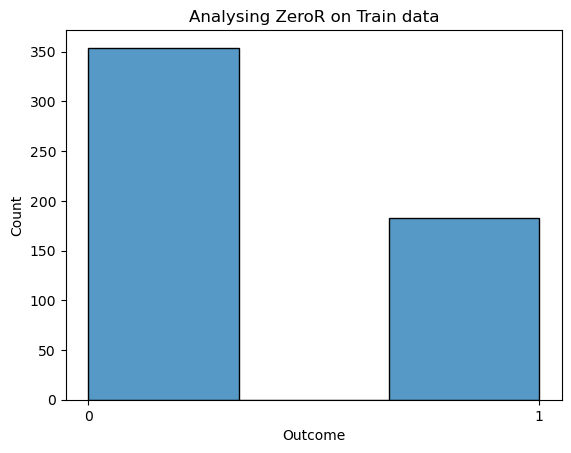

In [7]:
print(x_train['Outcome'].value_counts())
sns.histplot(x_train['Outcome'],bins=3,kde=False)
plt.title("Analysing ZeroR on Train data")
plt.xticks([0,1])
plt.show()

### Test Data 

0    146
1     85
Name: Outcome, dtype: int64


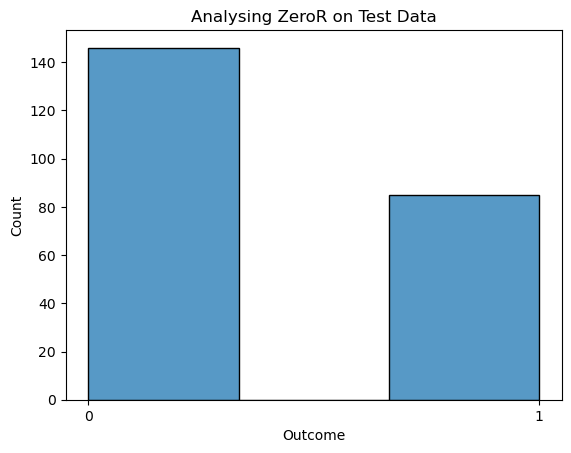

In [8]:
print(x_test['Outcome'].value_counts())
sns.histplot(x_test['Outcome'],bins=3,kde=False)
plt.title("Analysing ZeroR on Test Data")
plt.xticks([0,1])
plt.show()

## Test Data Zero R 

In [9]:
# Calculate the majority class
majority_class = x_train['Outcome'].mode()[0]
# Make predictions on train and test data
predictions_train = [majority_class] * len(x_train)
predictions_test = [majority_class] * len(x_test)

# Evaluate accuracy
correct_predictions_test = sum(predictions_test == x_test['Outcome'])
correct_predictions_train = sum(predictions_train == x_train['Outcome'])
accuracy_test = correct_predictions_test / len(x_test)
accuracy_train = correct_predictions_train / len(x_train)

print("Predicted class:", majority_class)
print("Accuracy of ZeroR on TEST DATA: {:.2%}".format(accuracy_test))
print("Accuracy of ZeroR on TRAIN DATA: {:.2%}".format(accuracy_train))

Predicted class: 0
Accuracy of ZeroR on TEST DATA: 63.20%
Accuracy of ZeroR on TRAIN DATA: 65.92%


# One R

In [10]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

"""
    For the One R classification, I used the DecisionTreeClassifier from sklearn to get the predictor.
"""

x = pd.DataFrame(data , columns = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = data.Outcome.values.reshape(-1 , 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3 , random_state = 1)

#Initialize the DecisionTree
clf = DecisionTreeClassifier()

# Train the classifier on the train data
clf.fit(x_train, y_train)

# Predict the target variable on the test data
y_pred = clf.predict(x_test)

# # Print the predicted class of the first sample in the test data
# print("Predicted Class: {}".format(y_pred[0]))

# Calculate and print the accuracy of the classifier on the train data
train_accuracy = clf.score(x_train, y_train)
print(f"Accuracy of TRAIN DATA: {train_accuracy:.2%}")

# Calculate and print the accuracy of the classifier on the test data
test_accuracy = clf.score(x_test, y_test)
print(f"Accuracy of TEST DATA: {test_accuracy:.2%}")

# Find the best feature used for predicting
best_feature_idx = clf.feature_importances_.argmax()
best_feature = data.columns[best_feature_idx]
print('Best Feature: {}'.format(best_feature))

Accuracy of TRAIN DATA: 100.00%
Accuracy of TEST DATA: 68.40%
Best Feature: Glucose


# K-Nearest Neighbor 

In [11]:
#Model
from sklearn.neighbors import KNeighborsClassifier
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

#setup arrays to store training and test accuracies
neighbors=np.arange(1,15)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)

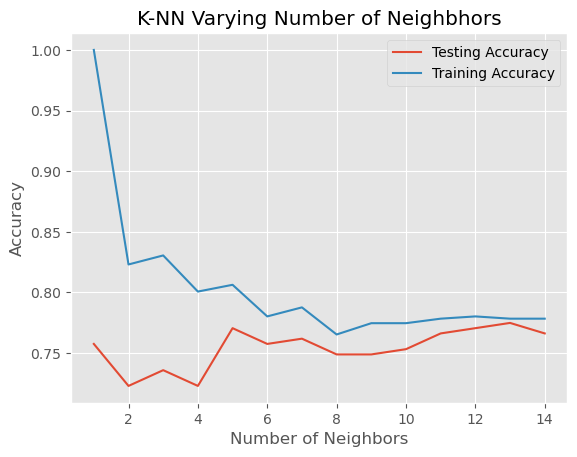

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title("K-NN Varying Number of Neighbhors")
plt.plot(neighbors,test_accuracy,label="Testing Accuracy")
plt.plot(neighbors,train_accuracy,label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [190]:
# Set the number of neighbors (k)
k = 13
# Initialize the KNeighborsClassifier with the specified k value
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [191]:
y_pred=model.predict(x_test)
y_pred

# Calculate accuracy for train data
train_accuracy = model.score(x_train, y_train)
train_accuracy_percent = train_accuracy * 100

# Calculate accuracy for test data
test_accuracy = accuracy_score(y_test, y_pred)
test_accuracy_percent = test_accuracy * 100

# Print the accuracy scores as percentages with 2 decimal places
print("KNN Accuracy for train data: {:.2f}%".format(train_accuracy_percent))
print("KNN Accuracy for test data: {:.2f}%".format(test_accuracy_percent))

KNN Accuracy for train data: 77.84%
KNN Accuracy for test data: 77.49%


# Decision Tree

In [13]:
from sklearn import metrics
#Initialize the DecisionTree module with max_depth of 3
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) #used entropy as criterion
clf = clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)

# Calculate accuracy for train data
train_accuracy = clf.score(x_train, y_train)
train_accuracy_percent = train_accuracy * 100

# Calculate accuracy for test data
test_accuracy = metrics.accuracy_score(y_test, y_pred)
test_accuracy_percent = test_accuracy * 100

# Print the accuracy scores as percentages with 2 decimal places
print('Accuracy of train data: {:.2f}%'.format(train_accuracy_percent))
print('Accuracy of test data: {:.2f}%'.format(test_accuracy_percent))

Accuracy of train data: 76.35%
Accuracy of test data: 77.06%


## Tree visualization

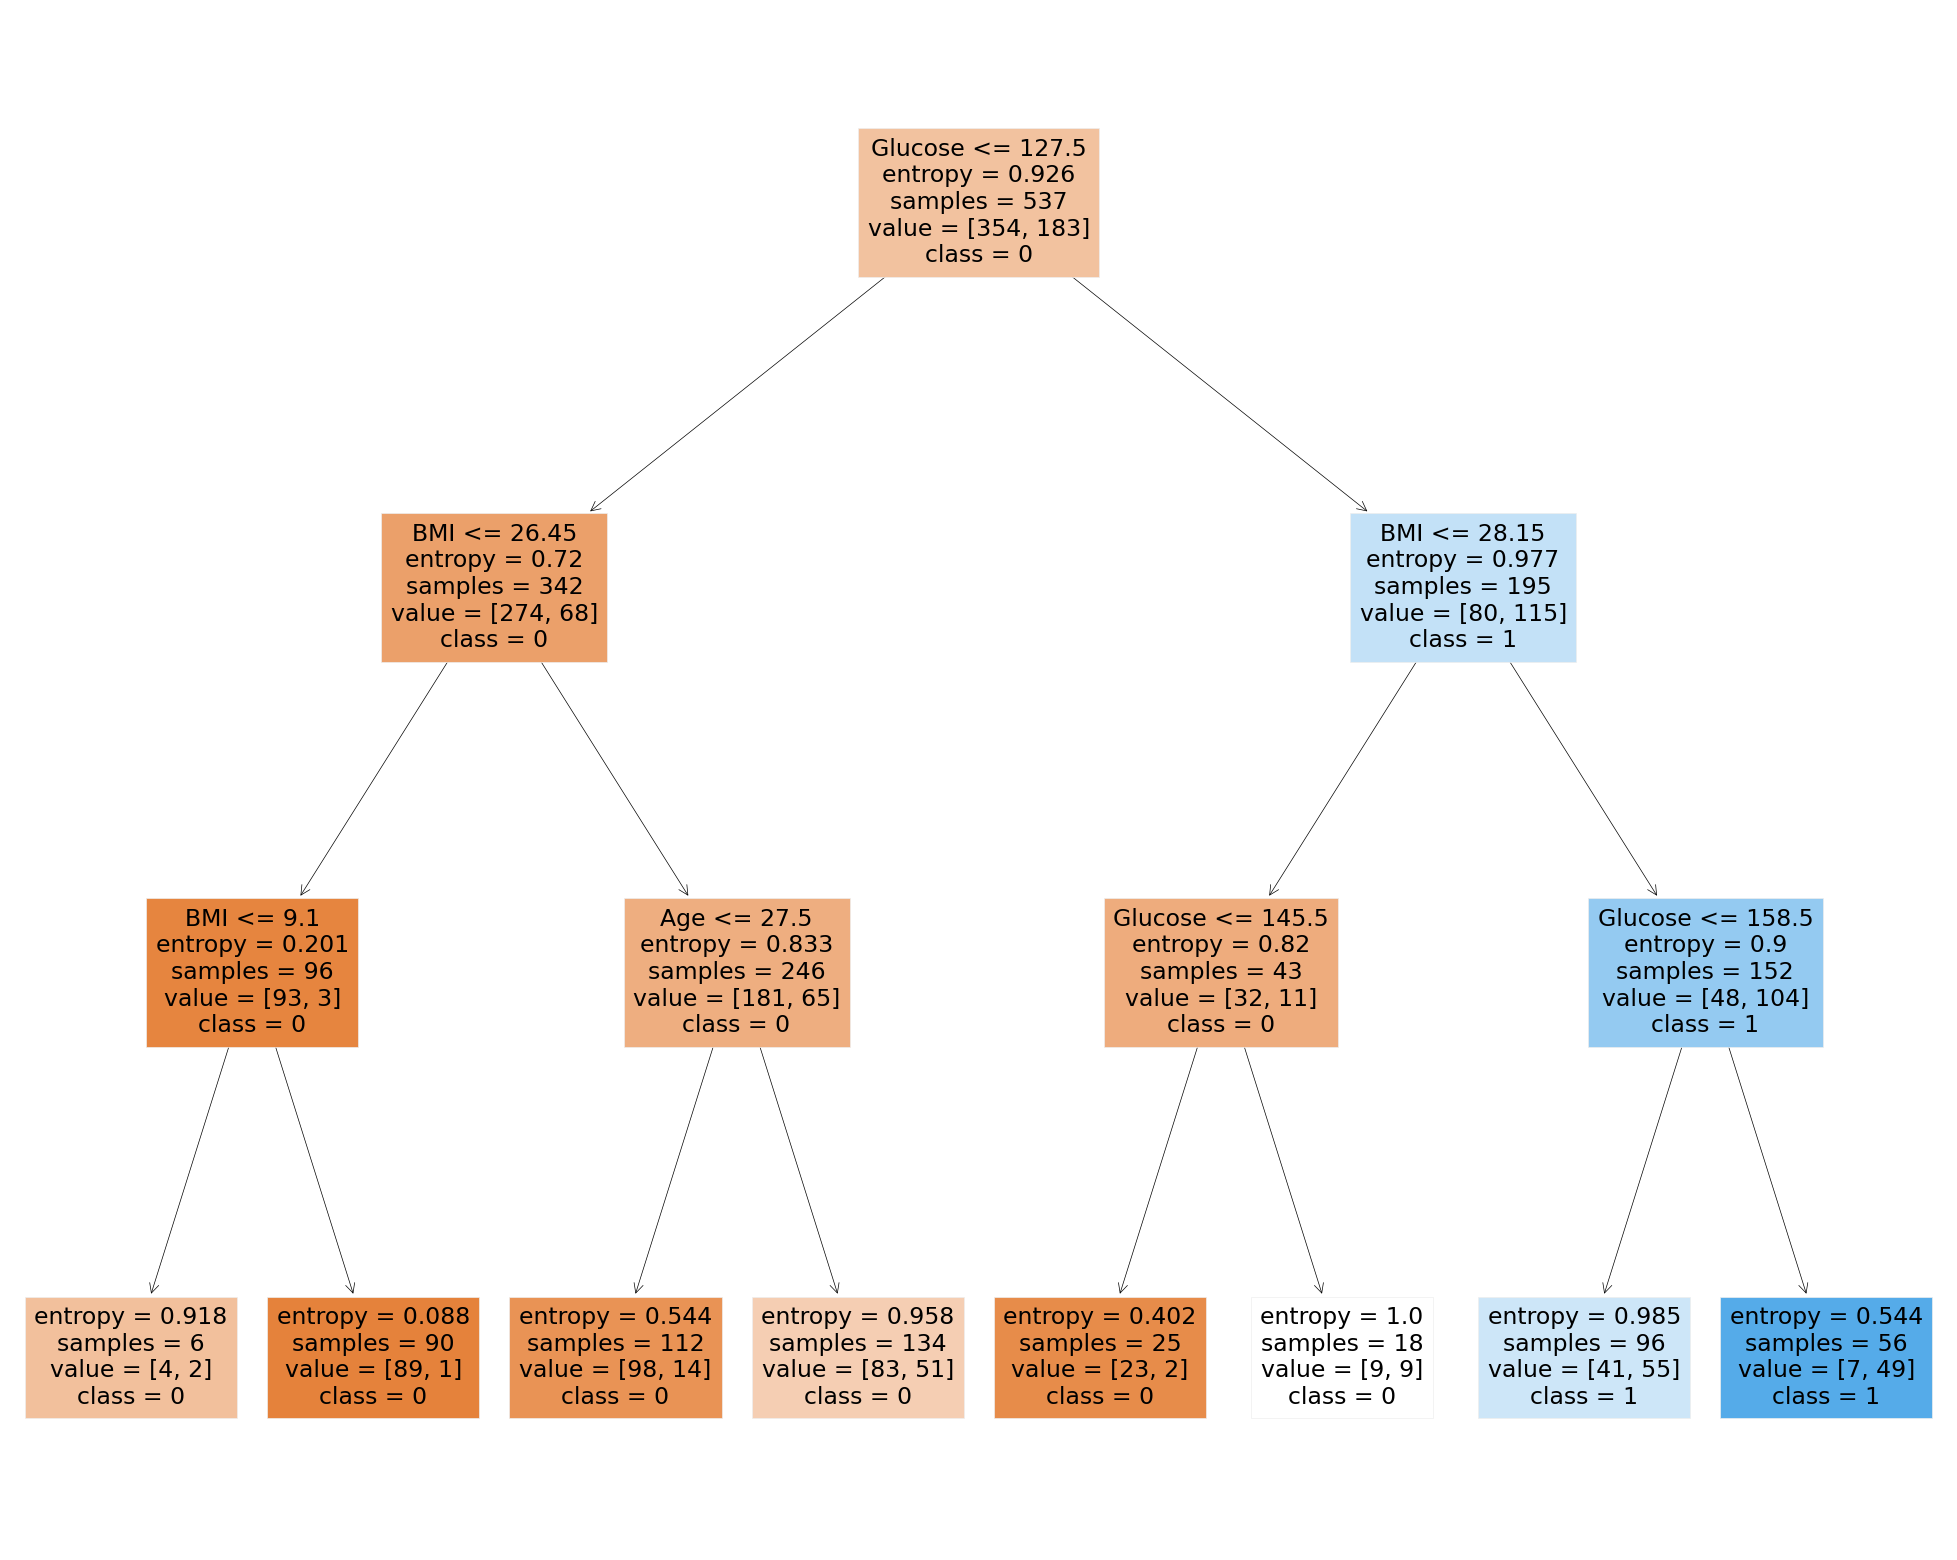

In [14]:
from sklearn import tree
text_representation = tree.export_text(clf)

with open ('decision_tree.log', 'w') as fout:
    fout.write(text_representation)
    
feature_names = ['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']
fig = plt.figure(figsize = (25 , 20))
plot = tree.plot_tree(clf,
                     feature_names = feature_names,
                     class_names = target_names,
                     filled = True)
fig.savefig('tree2.png')